In [525]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

## 1. Gathering data

In [2]:
# Gather Twitter archive
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
# Gather Image predictions
# Downloading the tweet image predictions
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
          file.write(response.content)

In [6]:
img_prdt = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
img_prdt.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
img_prdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# Gather tweets from Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [12]:
df_retwt = []
exceptions = []

start = time.time()

for tweet_id in df['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode='extended',
                             wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        
        fvrt_cnt = page['favorite_count']
        retwt_cnt = page['retweet_count']
        
        df_retwt.append({'tweet_id': int(tweet_id),
                  'favorites': int(fvrt_cnt),
                  'retweets': int(retwt_cnt)})
        
    except Exception as e:
        exceptions.append(tweet_id)

end = time.time()
print('Executing time:', end-start)

Rate limit reached. Sleeping for: 564
Rate limit reached. Sleeping for: 709
Rate limit reached. Sleeping for: 713


Executing time: 2579.901099920273


In [15]:
df_retwt = pd.DataFrame(df_retwt, columns=['tweet_id', 'favorites','retweets'])

In [17]:
df_retwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id     2339 non-null int64
favorites    2339 non-null int64
retweets     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [18]:
df_retwt.head()

,tweet_id,favorites,retweets
0,892420643555336193,38446,8461
1,892177421306343426,32949,6230
2,891815181378084864,24821,4130
3,891689557279858688,41806,8581
4,891327558926688256,39970,9316


In [19]:
# Write this into txt file
df_retwt.to_csv('tweet_json.txt', encoding='utf-8')

In [20]:
df_twt = pd.read_csv('tweet_json.txt', encoding='utf-8', index_col=0)

In [21]:
df_twt.head()

,tweet_id,favorites,retweets
0,892420643555336193,38446,8461
1,892177421306343426,32949,6230
2,891815181378084864,24821,4130
3,891689557279858688,41806,8581
4,891327558926688256,39970,9316


## 2. Assessing data

In [25]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
img_prdt.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_twt.describe()

,tweet_id,favorites,retweets
count,2.339000e+03,2339.000000,2339.000000
mean,7.422745e+17,8038.164173,2978.384352
std,6.837583e+16,12372.513712,4990.097380
min,6.660209e+17,0.000000,0.000000
25%,6.783607e+17,1391.000000,598.000000
50%,7.186315e+17,3505.000000,1390.000000
75%,7.986999e+17,9870.000000,3477.000000
max,8.924206e+17,164118.000000,84515.000000


In [351]:
df[df['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [352]:
img_prdt[img_prdt['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [353]:
df_twt[df_twt['tweet_id'].duplicated()]

,tweet_id,favorites,retweets


### Quality
- Capitalizing all dog's name, and fix 'None' to Null_value.
- The denominator columns cannot have zero value.
- The following columns have wrong data types: tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp
- The following columns don't seem to be necessary as we won't consider the data retweeted: retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.
- the favorites and retweets columns' data type are wrong. Should be fixed to an integer type.
- The entries don't have pictures should be removed from the dataset.
- In df, nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'. After condensing these column into one column, fix 'None' value to Null_value so it can be counted as empty data.
- Dog's breed column is needed to be capitalized in the dog prediction dataframe to compare with other columns.(p1, p2, p3)
- Wrong data types of 'tweet_id' in the both dataframes, df_clean and breed_prediction.


### Tidiness
- The two dataframes(df, df_twt) can be unified into one on tweet_id.
- The doggo, pupper, puppo, and floofer columns can be condensed.
- Rating_numerator and denominator should be one variable rating.

## 3. Cleaning data

In [324]:
# Don't forget to copy the dataframes before starting cleaning.
df_clean = df.copy()
img_prdt_clean = img_prdt.copy()
df_twt_clean = df_twt.copy()

### Define: The columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are not needed.

#### Code:

In [325]:
df_clean.info()

# Drop all columns that relate to retweet.
df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Test:

In [326]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


### Define: Condensing dog type(doggo, floofer, pupper, puppo) into a column.

#### Code:

In [327]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


In [328]:
df_clean['type'] = ''

df_clean.loc[df_clean['doggo'] == 'doggo','type'] += 'doggo'
df_clean.loc[df_clean['floofer'] == 'floofer','type'] += 'floofer'
df_clean.loc[df_clean['pupper'] == 'pupper','type'] += 'pupper'
df_clean.loc[df_clean['puppo'] == 'puppo','type'] += 'puppo'

df_clean['type'].replace('', np.nan, inplace=True)

print(df_clean['type'].value_counts())

# Adding comma(,) if it has more than one type.
df_clean['type'].replace('doggopupper', 'doggo,pupper', inplace=True)
df_clean['type'].replace('doggopuppo', 'doggo,puppo', inplace=True)
df_clean['type'].replace('doggofloofer', 'doggo,floofer', inplace=True)

# Deleting the 4 columns after combining them.
df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: type, dtype: int64


#### Test:

In [329]:
# There are some entries which indiciated their dogs with more than one type.
# As a result, there are values such as 'doggo+pupper','doggo+puppo','doggo+floofer' in the type column.

print('The number of "doggo":', len(df[df['doggo'] == 'doggo']))
print('The number of "floofer":', len(df[df['floofer'] == 'floofer']))
print('The number of "pupper":',len(df[df['pupper'] == 'pupper']))
print('The number of "puppo":', len(df[df['puppo'] == 'puppo']))

print('\nThe numbers of doggy type after combining into a column(type)')
df_clean['type'].value_counts()

The number of "doggo": 97
The number of "floofer": 10
The number of "pupper": 257
The number of "puppo": 30

The numbers of doggy type after combining into a column(type)


pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: type, dtype: int64

### Define: We only consider the ratings with images. Getting rid of the entries without a value of the column(expanded_urls). 

#### Code:

In [330]:
df_clean.info()

df_clean = df_clean[~df_clean['expanded_urls'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
type                     380 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 202.5+ KB


#### Test:

In [331]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2297 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2297 non-null object
source                   2297 non-null object
text                     2297 non-null object
expanded_urls            2297 non-null object
rating_numerator         2297 non-null int64
rating_denominator       2297 non-null int64
name                     2297 non-null object
type                     374 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 215.3+ KB


### Define: Retweet/favorites data can be joined into the main dataframe on tweet_id. 

#### Code:

In [334]:
# Join df_clean and df_twt_clean dataframe on tweet_id into a unified dataframe.
df_clean = pd.merge(left=df_clean, right=df_twt_clean, how='left')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 13 columns):
tweet_id                 2297 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2297 non-null object
source                   2297 non-null object
text                     2297 non-null object
expanded_urls            2297 non-null object
rating_numerator         2297 non-null int64
rating_denominator       2297 non-null int64
name                     2297 non-null object
type                     374 non-null object
favorites                2280 non-null float64
retweets                 2280 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 251.2+ KB


#### Test:

In [336]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 13 columns):
tweet_id                 2297 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2297 non-null object
source                   2297 non-null object
text                     2297 non-null object
expanded_urls            2297 non-null object
rating_numerator         2297 non-null int64
rating_denominator       2297 non-null int64
name                     2297 non-null object
type                     374 non-null object
favorites                2280 non-null float64
retweets                 2280 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 251.2+ KB


### Define: Some favorites and retweets value have Null-value. Find these value by connecting API one more.

#### Code:

In [337]:
# Filtering tweet_ids which does not have favorites/retweets value.
empty_fav = df_clean[df_clean['favorites'].isnull()]['tweet_id']

for get_id in empty_fav:
    try:    
        page = api.get_status(get_id, tweet_mode='extended')
        fvrt_cnt1 = page['favorite_count']
        retwt_cnt1 = page['retweet_count']
        
        # Replace an empty value with the new foundings.
        df_clean.loc[df_clean['tweet_id'] == get_id, 'favorites'] = int(fvrt_cnt1)
        df_clean.loc[df_clean['tweet_id'] == get_id, 'retweets'] = int(retwt_cnt1)
    except:
        exceptions.append(get_id)


In [338]:
# Extract data which has favorites/retweets value.
df_clean = df_clean[~df_clean['favorites'].isnull()]

#### Test:

In [339]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2296
Data columns (total 13 columns):
tweet_id                 2283 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2283 non-null object
source                   2283 non-null object
text                     2283 non-null object
expanded_urls            2283 non-null object
rating_numerator         2283 non-null int64
rating_denominator       2283 non-null int64
name                     2283 non-null object
type                     371 non-null object
favorites                2283 non-null float64
retweets                 2283 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 249.7+ KB


### Define: Data type of favorites and retweets columns seem to be wrong. Should be fixed to an integer not a float.

#### Code:

In [340]:
df_clean['favorites'] = df_clean['favorites'].astype(int)
df_clean['retweets'] = df_clean['retweets'].astype(int)

#### Test:

In [341]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2296
Data columns (total 13 columns):
tweet_id                 2283 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2283 non-null object
source                   2283 non-null object
text                     2283 non-null object
expanded_urls            2283 non-null object
rating_numerator         2283 non-null int64
rating_denominator       2283 non-null int64
name                     2283 non-null object
type                     371 non-null object
favorites                2283 non-null int64
retweets                 2283 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 249.7+ KB


### Define: Wrong data types (in_reply_to_status_id, in_reply_to_user_id, timestamp)

#### Code:

In [342]:
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype(str)
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype(str)
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

# And then replace 'nan' value to Null_value.
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].replace('nan', np.nan)
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].replace('nan', np.nan)

#### Test:

In [343]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2296
Data columns (total 13 columns):
tweet_id                 2283 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2283 non-null datetime64[ns]
source                   2283 non-null object
text                     2283 non-null object
expanded_urls            2283 non-null object
rating_numerator         2283 non-null int64
rating_denominator       2283 non-null int64
name                     2283 non-null object
type                     371 non-null object
favorites                2283 non-null int64
retweets                 2283 non-null int64
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 249.7+ KB


### Define: Wrong data types of 'tweet_id' in the both dataframes, df_clean and breed_prediction.

#### Code:

In [344]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
img_prdt_clean['tweet_id'] = img_prdt_clean['tweet_id'].astype(str)

#### Test:

In [345]:
print(df_clean.info(), img_prdt_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2296
Data columns (total 13 columns):
tweet_id                 2283 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2283 non-null datetime64[ns]
source                   2283 non-null object
text                     2283 non-null object
expanded_urls            2283 non-null object
rating_numerator         2283 non-null int64
rating_denominator       2283 non-null int64
name                     2283 non-null object
type                     371 non-null object
favorites                2283 non-null int64
retweets                 2283 non-null int64
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 249.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non

### Define: The denominator value cannot be zero-value. Create a new column 'rating'(=rating_numerator/rating_denominator). Drop the both of the columns(rating_numerator and rating_denominator)

#### Code:

In [346]:
# Quick visual check that it has only valid value.
print(df_clean[df_clean['rating_denominator']==0])

# Adding a new column, 'rating'
df_clean['rating'] = df_clean['rating_numerator']/df_clean['rating_denominator']

# Dropping the two columns(rating_numerator and rating_denominator)
df_clean.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, type, favorites, retweets]
Index: []


#### Test:

In [347]:
print(df_clean.info())
print(df_clean['rating'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2296
Data columns (total 12 columns):
tweet_id                 2283 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2283 non-null datetime64[ns]
source                   2283 non-null object
text                     2283 non-null object
expanded_urls            2283 non-null object
name                     2283 non-null object
type                     371 non-null object
favorites                2283 non-null int64
retweets                 2283 non-null int64
rating                   2283 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 231.9+ KB
None
1.200000      546
1.100000      461
1.000000      457
1.300000      333
0.900000      155
0.800000      102
0.700000       52
1.400000       48
0.500000       36
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        5

### Define: Capitalizing all dog's name, and fix 'None' to Null_value.

#### Code:

In [348]:
df_clean['name'] = df_clean['name'].str.capitalize()

df_clean['name'].replace('None', np.nan, inplace=True)

#### Test:

In [349]:
df_clean['name'].value_counts()

A             55
Oliver        11
Cooper        11
Lucy          11
Charlie       11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
The            8
An             7
Daisy          7
Buddy          7
Bailey         7
Toby           7
Scout          6
Dave           6
Jack           6
Oscar          6
Leo            6
Koda           6
Stanley        6
Milo           6
Rusty          6
Bella          6
Jax            6
Bentley        5
Alfie          5
              ..
Harrison       1
Mack           1
Henry          1
Acro           1
Tess           1
Rambo          1
Furzey         1
Jaycob         1
Edgar          1
Damon          1
Dondon         1
Brandonald     1
Einstein       1
Tommy          1
Dallas         1
Bobble         1
Simba          1
Tycho          1
Frönq          1
Wesley         1
Jd             1
Joshwa         1
Rumble         1
Tassy          1
Bonaparte      1
Kallie         1
Sprout         1
Tater         

### Define: Dog's breed column is needed to be capitalized in the dog prediction dataframe to compare with other columns.(p1, p2, p3).

#### Code:

In [355]:
img_prdt_clean['p1'] = img_prdt_clean['p1'].str.capitalize()
img_prdt_clean['p2'] = img_prdt_clean['p2'].str.capitalize()
img_prdt_clean['p3'] = img_prdt_clean['p3'].str.capitalize()

#### Test:

In [357]:
img_prdt_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman


### Define: Combining two dataframes into one for the convenience of analyzing and managing data.

#### Code:

In [385]:
df_clean = pd.merge(left=df_clean, right=img_prdt_clean, how='left')

#### Test:

In [386]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2282
Data columns (total 23 columns):
tweet_id                 2283 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2283 non-null datetime64[ns]
source                   2283 non-null object
text                     2283 non-null object
expanded_urls            2283 non-null object
name                     1604 non-null object
type                     371 non-null object
favorites                2283 non-null int64
retweets                 2283 non-null int64
rating                   2283 non-null float64
jpg_url                  2067 non-null object
img_num                  2067 non-null float64
p1                       2067 non-null object
p1_conf                  2067 non-null float64
p1_dog                   2067 non-null object
p2                       2067 non-null object
p2_conf                  2067 non-null float64
p2_dog        

### Final Test

In [387]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2282
Data columns (total 23 columns):
tweet_id                 2283 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2283 non-null datetime64[ns]
source                   2283 non-null object
text                     2283 non-null object
expanded_urls            2283 non-null object
name                     1604 non-null object
type                     371 non-null object
favorites                2283 non-null int64
retweets                 2283 non-null int64
rating                   2283 non-null float64
jpg_url                  2067 non-null object
img_num                  2067 non-null float64
p1                       2067 non-null object
p1_conf                  2067 non-null float64
p1_dog                   2067 non-null object
p2                       2067 non-null object
p2_conf                  2067 non-null float64
p2_dog        

### Store Data

>  Store the final and clean dataframe into a CSV file, **twitter_archive_master.csv**

In [388]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

### Visualizations and Analyses

- The relation between Doggy type and favorites/retweets
- The most common dog breed for a prediction

In [392]:
df_final = pd.read_csv('twitter_archive_master.csv')

In [393]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 23 columns):
tweet_id                 2283 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2283 non-null object
source                   2283 non-null object
text                     2283 non-null object
expanded_urls            2283 non-null object
name                     1604 non-null object
type                     371 non-null object
favorites                2283 non-null int64
retweets                 2283 non-null int64
rating                   2283 non-null float64
jpg_url                  2067 non-null object
img_num                  2067 non-null float64
p1                       2067 non-null object
p1_conf                  2067 non-null float64
p1_dog                   2067 non-null object
p2                       2067 non-null object
p2_conf                  2067 non-null float64
p2_dog               

### Doggy type in relation to favorites/retweets

> I want to research how favorites and retweets are related to each other. In addition, I'd like to investigate how it differs depending on the type of doggy(doggo, pupper, puppo, floofer)

In [397]:
d1 = df_final[df_final['type'].notnull()][['type','favorites','retweets']]

In [490]:
mean_all_f = df_final['favorites'].mean()
mean_all_r = df_final['retweets'].mean()
print("The average number of all favorites:",int(round(mean_all_f)))
print("The average number of all retweetes:",int(round(mean_all_r)))

The average number of all favorites: 8198
The average number of all retweetes: 3047


In [488]:
mean_of_f = d1['favorites'].mean()
mean_of_r = d1['retweets'].mean()
print("The average number of favorites:",int(round(mean_of_f)))
print("The average number of retweetes:",int(round(mean_of_r)))

The average number of favorites: 10005
The average number of retweetes: 4053


In [408]:
d1.groupby(by='type').mean()

,favorites,retweets
type,,
doggo,17121.253165,7202.025316
"doggo,floofer",16700.000000,3314.000000
"doggo,pupper",10089.416667,4945.083333
"doggo,puppo",46548.000000,18509.000000
floofer,10731.888889,3978.777778
pupper,6522.925311,2669.589212
puppo,18084.678571,6233.250000


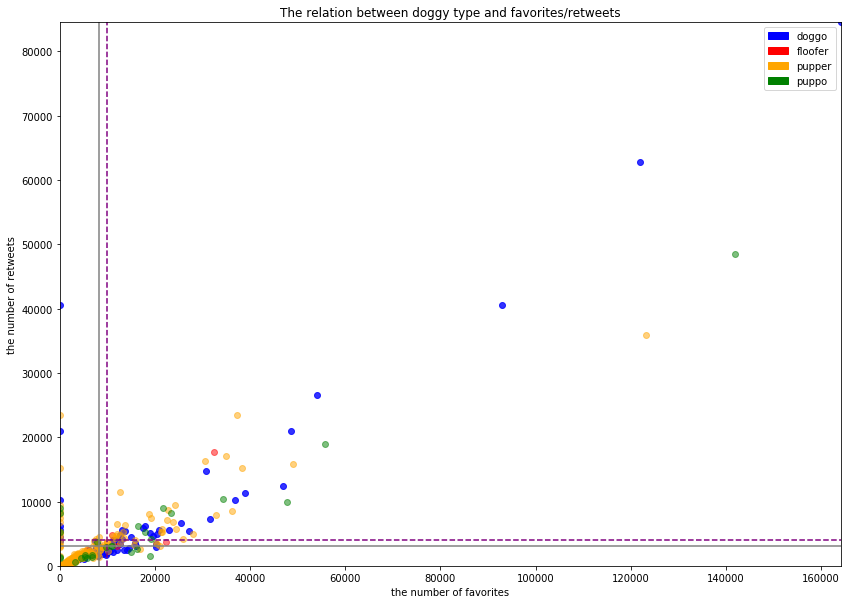

In [514]:
fig1 = plt.figure(figsize=(14,10))
ax1=fig1.add_subplot(111,xlim=(min(d1['favorites']), max(d1['favorites'])),
                     ylim=(min(d1['retweets']), max(d1['retweets'])))

doggo = d1[d1['type']=='doggo']
floofer = d1[d1['type']=='floofer']
pupper = d1[d1['type']=='pupper']
puppo = d1[d1['type']=='puppo']

ax1.scatter(x=doggo['favorites'], y=doggo['retweets'],
           color='blue', alpha=0.8)
ax1.scatter(x=floofer['favorites'], y=floofer['retweets'],
           color='red', alpha=0.5)
ax1.scatter(x=pupper['favorites'], y=pupper['retweets'],
           color='orange', alpha=0.5)
ax1.scatter(x=puppo['favorites'], y=puppo['retweets'],
           color='green', alpha=0.5)

ax1.set_xlabel('the number of favorites')
ax1.set_ylabel('the number of retweets')
ax1.set_title('The relation between doggy type and favorites/retweets')

# Setting for legend
doggos = mpatches.Patch(label='doggo', color='blue')
floofers = mpatches.Patch(label='floofer', color='red')
puppers = mpatches.Patch(label='pupper', color='orange')
puppos = mpatches.Patch(label='puppo', color='green')
plt.legend(handles=[doggos, floofers, puppers, puppos])

# Draw lines of the average number of favorites and retweets
ax1.axhline(y = mean_of_r, linestyle='--', color='purple')
ax1.axvline(x = mean_of_f, linestyle='--', color='purple')
ax1.axhline(y = mean_all_r, linestyle='-', color='grey')
ax1.axvline(x = mean_all_f, linestyle='-', color='grey')

plt.show()

I plotted a scatterplot of all data (there are only 371 entries with doggy type data) with the averages number of favorites and retweets.

The average number of favorites and retweets is higher if the entry has the information of doggy type than the others which do not have.
> - purple dotted line: the averages of data which has doggy type information.
> - grey solid line: the averages of all data

There is a linear relationship between favorites and retweets. However, there tends to be 2.5 times as many favorites as retweets. In addition, there are some data retweeted with no favorites received, even though there is no case the other way around.

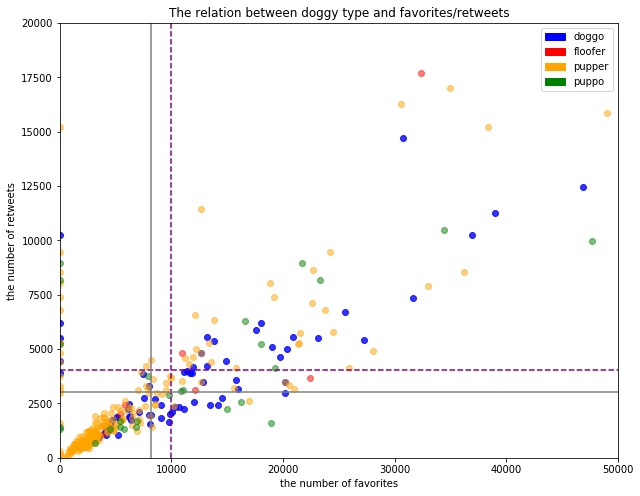

In [508]:
# Zoom in the area where the data is gathered densely.
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111, xlim=(0,50000), ylim=(0,20000))

ax.scatter(x=doggo['favorites'], y=doggo['retweets'],
           color='blue', alpha=0.8)
ax.scatter(x=floofer['favorites'], y=floofer['retweets'],
           color='red', alpha=0.5)
ax.scatter(x=pupper['favorites'], y=pupper['retweets'],
           color='orange', alpha=0.5)
ax.scatter(x=puppo['favorites'], y=puppo['retweets'],
           color='green', alpha=0.5)

ax.set_xlabel('the number of favorites')
ax.set_ylabel('the number of retweets')
ax.set_title('The relation between doggy type and favorites/retweets')

# Setting for legend
plt.legend(handles=[doggos, floofers, puppers, puppos])

# Draw lines of the average number of favorites and retweets
ax.axhline(y = mean_of_r, linestyle='--', color='purple')
ax.axvline(x = mean_of_f, linestyle='--', color='purple')
ax.axhline(y = mean_all_r, linestyle='-', color='grey')
ax.axvline(x = mean_all_f, linestyle='-', color='grey')

plt.show()

- 'pupper' tends to receive less favorites and retweets as you can see orange dots are highly dense under the average bars.
- 'doggo' is the most popular among other doggy types many of blue dots are appeared in the upper part of the averages.

### The relation between rating and favorites/retweets

> Then, how we can anticipate the ratings and is there any correlation with favorites and retweets?

In [726]:
d2 = df_final[['favorites','retweets','rating']]

mean_df = pd.DataFrame(d2['rating'].value_counts())
mean_df.reset_index(inplace=True)
mean_df.columns = ['rating', 'counts']

mean_df.sort_values(by='rating', inplace=True)

fav = []
ret = []
for r in mean_df['rating']:
    fav.append(d2[d2['rating']==r].mean()[0])
    ret.append(d2[d2['rating']==r].mean()[1])
    
mean_df['favorites'] = fav
mean_df['retweets'] = ret
mean_df['rating'] = round(mean_df['rating'], 2)
mean_df.reset_index(inplace=True)
mean_df.drop('index', axis=1, inplace=True)

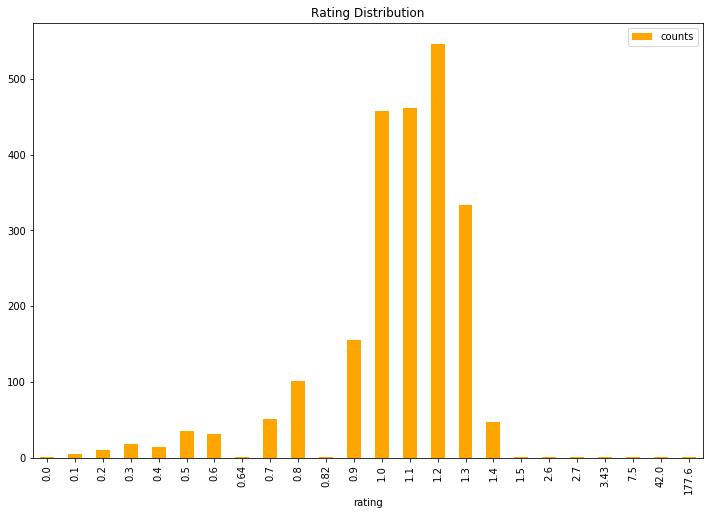

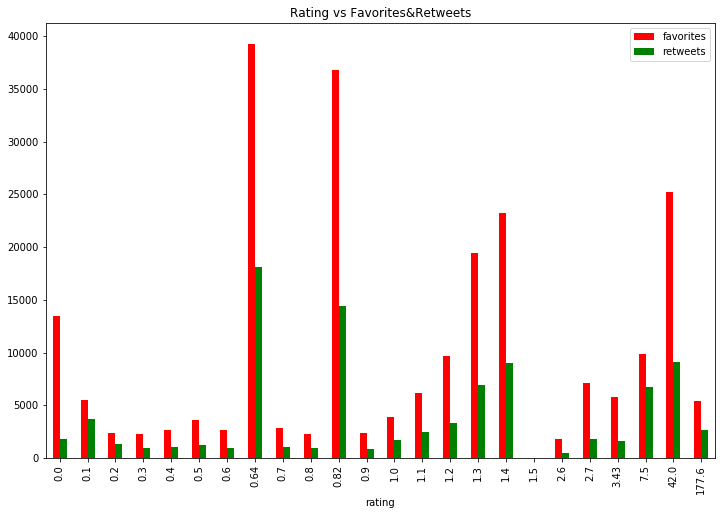

,rating,counts,favorites,retweets
0,0.00,2,13460.000000,1811.000000
1,0.10,5,5510.200000,3726.000000
2,0.20,10,2391.900000,1326.800000
3,0.30,19,2313.631579,909.473684
4,0.40,15,2647.333333,1056.133333
5,0.50,36,3606.277778,1201.027778
6,0.60,32,2628.437500,999.281250
7,0.64,1,39271.000000,18162.000000
8,0.70,52,2868.480769,1072.096154
9,0.80,102,2266.568627,977.362745


In [727]:
mean_df[['rating','counts']].plot(x='rating', kind='bar',
                title='Rating Distribution', figsize=(12,8), color='orange')

mean_df[['rating','favorites','retweets']].plot(x='rating', kind='bar',
                title='Rating vs Favorites&Retweets', figsize=(12,8), color=['red','green'])
plt.show()

mean_df

- Most of dogs have rated between 0.9 and 1.3 as you can find it in the first graph.
- In the second graph, the number of favorites and retweets has a significant linear correlation in the section between 0.9 and 1.4 ratings.
- However, some ratings(0.64, 0.82, 42) have unusual high value as you find it in the second graph. And this is unreliable data, because there was just only one person to mark this rate according to the last table. Therefore, we can consider this is not a representative figure of the user's tendency.

### Question: Does the accuracy rate for the breed prediction differ depending on the dog breed?

In [887]:
# I collected breed prediction data to get a means for each breed.
# The accuracy rate for each breed.

cols = ['breed','confidence','True/False']

d11 = df_final[['p1','p1_conf','p1_dog']]
d11.columns = cols
d22 = df_final[['p2','p2_conf','p2_dog']]
d22.columns = cols
d33 = df_final[['p3','p3_conf','p3_dog']]
d33.columns = cols

df_predict = d11.append(d22, ignore_index=True)
df_predict = df_predict.append(d33, ignore_index=True)
df_predict = df_predict[df_predict['breed'].notnull()]

print(df_predict.info())

# Conver 'True/False' value to '1/0' from bool type for calculating easily.
df_predict.loc[df_predict['True/False']==True, 'True/False'] = 1
df_predict.loc[df_predict['True/False']==False, 'True/False'] = 0

print('-----------------')
print(df_predict.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6201 entries, 0 to 6848
Data columns (total 3 columns):
breed         6201 non-null object
confidence    6201 non-null float64
True/False    6201 non-null object
dtypes: float64(1), object(2)
memory usage: 193.8+ KB
None
-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6201 entries, 0 to 6848
Data columns (total 3 columns):
breed         6201 non-null object
confidence    6201 non-null float64
True/False    6201 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 193.8+ KB
None


In [927]:
# Getting an accuracy rate for predicting dog breeds.
total_cnt = len(df_predict)
true_cnt = sum(df_predict['True/False'])
false_cnt = total_cnt - true_cnt

accrcy_rate = true_cnt/total_cnt*100
print('The overall accuracy rate is', accrcy_rate,'(%)')

# Calculating the accuracy rate for each dog breeds.
ac_list = []
common_brd = (df_predict['breed'].value_counts()).index
for brd in common_brd:
    ttl_cnt = df_predict[df_predict['breed'] == brd]['True/False'].count()
    tr_cnt = df_predict[df_predict['breed'] == brd]['True/False'].sum()
    acrcy = tr_cnt/ttl_cnt*100
    ac_list.append(acrcy)
    

# Filter sub-dataframe only with 15 most common dog breeds.
df_grp = df_predict.groupby(by='breed').count()
df_grp.sort_values(by='confidence', ascending=False, inplace=True)


The overall accuracy rate is 73.69779067892276 (%)


In [937]:
df_grp['accuracy'] = ac_list

# The average accuracy of 50/50~100/100~200/200~400/400~ breeds:
print('The average accuracy of most common 50 breeds is:',df_grp[['accuracy']][:50].mean())
print('The average accuracy of the second common 50 breeds is:',df_grp[['accuracy']][50:100].mean())
print('The average accuracy of the next common 100 breeds is:',df_grp[['accuracy']][100:200].mean())
print('The average accuracy of the next common 200 breeds is:',df_grp[['accuracy']][200:400].mean())
print('The average accuracy of the least common 100 breeds is:',df_grp[['accuracy']][400:].mean())
# df_grp['accuracy'].value_counts()

The average accuracy of most common 50 breeds is: accuracy    93.982759
dtype: float64
The average accuracy of the second common 50 breeds is: accuracy    78.0
dtype: float64
The average accuracy of the next common 100 breeds is: accuracy    25.0
dtype: float64
The average accuracy of the next common 200 breeds is: accuracy    3.5
dtype: float64
The average accuracy of the least common 100 breeds is: accuracy    0.0
dtype: float64


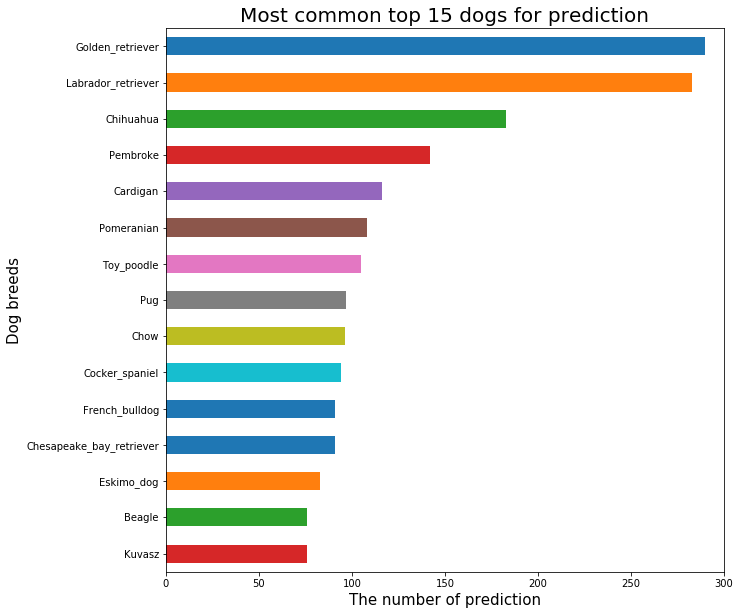

In [897]:
# Plotting the 15 most common dog breeds for prediction.

df_grp[:15]['confidence'].plot(kind='barh', figsize=(10,10), xlim=(0,300))
plt.gca().invert_yaxis()
plt.title('Most common top 15 dogs for prediction', size=20)
plt.xlabel('The number of prediction', size=15)
plt.ylabel('Dog breeds', size=15)

plt.show();

- Overall, the accuracy rate for predicting dog breeds is about 74% which seems pretty reliable(It can guess the type of dogs correctly 3 cases out of 4.).
- There is no strong evidence for explaining whether there's the differentiation of accuracy depending on dog breeds. If a learning system has more data, then becomes more accurate to predict. It doesn't neccessarily mean that a system recognize some specific breeds more precisely. Because the accuraty is 100% for the most of dog breeds of the top 50 common ones. We can assume that the prediction system might be trained with so many data to be correct.
- We next plotted the 15 most common dog breeds in a bar chart. We see that according to this chart, the most common dog breed is the golden retriever with almost 300 times.

### Dog Breed  Popularity

In [752]:
d22

,breed,confidence,True/False
0,Bagel,0.085851,False
1,Pekinese,0.090647,True
2,Malamute,0.078253,True
3,Labrador_retriever,0.168086,True
4,English_springer,0.225770,True
5,Irish_terrier,0.116317,True
6,Border_collie,0.199287,True
7,Eskimo_dog,0.178406,True
8,Irish_setter,0.193054,True
9,Cardigan,0.451038,True
